# 1.Collect Initial Data

In [4]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
file_names = [os.path.basename(x) for x in glob.glob("..\\..\\Datos\\[!~]*.xlsx")]
dir_files = glob.glob("..\\..\\Datos\\[!~]*.xlsx")

print(file_names)


['AltosDelValle_Cotizaciones.xlsx', 'AltosDelValle_Negocios.xlsx', 'cotizaciones_all.xlsx', 'Junge_Cotizaciones.xlsx', 'Junge_Negocios.xlsx', 'Mil610_Cotizaciones.xlsx', 'Mil610_Negocios.xlsx', 'negocios_all.xlsx', 'SanAndresDelValle_Cotizaciones.xlsx', 'SanAndresDelValle_Negocios.xlsx', 'Urban_Cotizaciones.xlsx', 'Urban_Negocios.xlsx']


In [6]:
project_names = [];project_types = [];project_file_types = []

for file in file_names:
    project_names.append(file.split('_')[0])
    project_types.append(file.split('_')[1].split('.')[0])
    project_file_types.append(file.split('.')[1])

In [7]:
dfs = []

for file_dir in dir_files:
    df = pd.read_excel(file_dir,header=0)
    dfs.append(df)


In [8]:
def get_col_group_description(df,col):
    num_cot = []
    info = dict()
    for group, frame in df.groupby(col):
        num_cot.append(len(frame))
    #     print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

    cot_serie = pd.Series(num_cot)
    info['count'] = cot_serie.count()
    info['max'] = cot_serie.max()
    info['mean'] = cot_serie.mean()
    info['std'] = cot_serie.std()
    return info

# 2 Cotizacion Data

## 2.1 Analysis File by File

In [9]:
cot_resume = pd.DataFrame()

cot_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Cotizaciones']
cot_names = [project_names[index] for index in range(0,len(project_names)) if index in cot_index]
cot_types = [project_types[index] for index in range(0,len(project_types)) if index in cot_index]
cot_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in cot_index]

cot = [dfs[index] for index in range(0,len(dfs)) if index in cot_index]

#start description
cot_resume['filas'] = [x.shape[0] for x in cot]
cot_resume['proyecto'] = cot_names
cot_resume['cols'] = [x.shape[1] for x in cot]
cot_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in cot]
cot_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in cot]
cot_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in cot]
cot_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in cot]
cot_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in cot]
cot_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in cot]

## 2.2 Files Resumen

In [10]:
cot_resume

,filas,proyecto,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max
0,496,AltosDelValle,41,2017-07-27 15:46:54,2018-05-20 17:58:24.067,257,1.929961,1.356033,10
1,830,Junge,41,2016-01-19 08:53:16,2018-05-21 17:33:47.000,335,2.477612,2.406069,20
2,1791,Mil610,41,2016-09-22 16:36:03,2018-05-22 13:33:02.000,775,2.310968,1.891111,16
3,10558,SanAndresDelValle,41,2013-08-19 16:58:26,2018-05-22 13:42:53.000,3816,2.766771,2.780687,45
4,2917,Urban,41,2017-03-24 18:36:24,2018-05-22 13:27:15.000,1365,2.136996,1.645081,13


## 2.3 Files Describe

In [11]:
cot_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,3318.400000,41.0,1309.600000,2.324462,2.015796,20.800000
std,4155.236371,0.0,1468.734081,0.320175,0.575681,14.024978
min,496.000000,41.0,257.000000,1.929961,1.356033,10.000000
25%,830.000000,41.0,335.000000,2.136996,1.645081,13.000000
50%,1791.000000,41.0,775.000000,2.310968,1.891111,16.000000
75%,2917.000000,41.0,1365.000000,2.477612,2.406069,20.000000
max,10558.000000,41.0,3816.000000,2.766771,2.780687,45.000000


## 2.4 All files Merged Analysis

In [13]:
# concat cotizaciones
cot_all = pd.concat(cot)
cot_all.to_excel('..\\..\\Datos\\cotizaciones_all.xlsx')

cot_all_resume = pd.DataFrame()
cot_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16592 entries, 0 to 2916
Data columns (total 41 columns):
ID                     16592 non-null int64
Fecha Cotizacion       16592 non-null datetime64[ns]
Medio                  16592 non-null object
Tipo de Medio          16060 non-null object
Proyecto               16592 non-null object
Etapa                  16592 non-null object
Productos              16509 non-null object
Presencial             14565 non-null object
Remoto                 13282 non-null object
Jefe Comercial         16592 non-null object
Ejecutivo Comercial    16592 non-null object
Total Productos        16562 non-null float64
Descuentos             16548 non-null float64
Valor Final Venta      16548 non-null float64
RUT                    16592 non-null object
Nombre                 16592 non-null object
Apellido 1             16553 non-null object
Apellido 2             16185 non-null object
Nombre Completo        16592 non-null object
Telefono               1994

## 2.5 Atributtes Null Chart

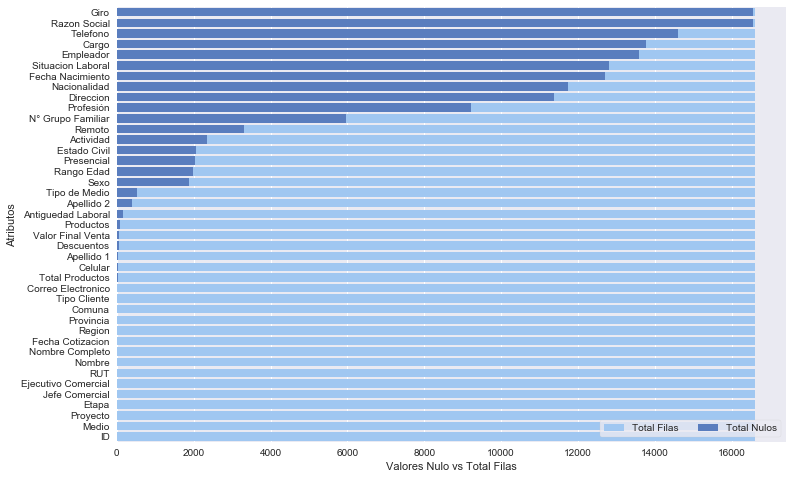

In [15]:
df = cot_all
null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
# sb.despine(left=True, bottom=True)
f.savefig("..\\img\\cot_all_attributes.png")

# 3 Negocios Data

## 3.1 Analysis File by File 

In [16]:
neg_resume = pd.DataFrame()

neg_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Negocios']
neg_names = [project_names[index] for index in range(0,len(project_names)) if index in neg_index]
neg_types = [project_types[index] for index in range(0,len(project_types)) if index in neg_index]
neg_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in neg_index]

neg = [dfs[index] for index in range(0,len(dfs)) if index in neg_index]

#start description
neg_resume['filas'] = [x.shape[0] for x in neg]
neg_resume['proyecto'] = neg_names
neg_resume['cols'] = [x.shape[1] for x in neg]
neg_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in neg]
neg_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in neg]
neg_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in neg]
neg_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in neg]
neg_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in neg]
neg_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in neg]

neg_resume['%es_anulados']  = [(len(x[x['Estado'] == 'Anulada'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_promesas']  = [(len(x[x['Estado'] == 'Promesado'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_entregado']  = [(len(x[x['Estado'] == 'Entregado'])/y) for x,y in zip(neg,neg_resume['filas'])]
# neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_desistido'] = [len(x[x['Estado Comercial'] == 'Desistimiento'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_normal']    = [len(x[x['Estado Comercial'] == 'Normal'])/y for x,y in zip(neg,neg_resume['filas'])]

## 3.2 Resumen

In [17]:
neg_resume

,filas,proyecto,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%es_entregado,%esc_desistido,%esc_normal
0,108,AltosDelValle,49,2017-07-27 15:46:58.750,2018-05-07 16:29:32.157,63,1.714286,1.312822,7,0.694444,0.240741,0.064815,0.000000,0.046296,0.944444
1,101,Junge,49,2016-01-25 13:21:02.013,2018-04-18 18:25:01.797,52,1.942308,1.487378,7,0.524752,0.079208,0.128713,0.000000,0.128713,0.801980
2,87,Mil610,49,2016-09-26 16:12:56.703,2018-05-17 11:55:49.837,54,1.611111,0.877747,5,0.517241,0.080460,0.068966,0.000000,0.068966,0.873563
3,1848,SanAndresDelValle,49,2013-08-19 18:35:56.620,2018-05-21 17:12:31.210,820,2.253659,1.807338,17,0.659091,0.094697,0.119048,0.018398,0.126623,0.830087
4,203,Urban,49,2017-03-27 17:03:29.563,2018-05-20 18:10:29.167,124,1.637097,1.177946,8,0.492611,0.349754,0.157635,0.000000,0.147783,0.837438


## 3.2 Describe

In [18]:
neg_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%es_entregado,%esc_desistido,%esc_normal
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,469.400000,49.0,222.600000,1.831692,1.332646,8.800000,0.577628,0.168972,0.107835,0.003680,0.103676,0.857503
std,772.020919,0.0,335.265268,0.269536,0.346602,4.711688,0.092131,0.121698,0.040010,0.008228,0.043578,0.054895
min,87.000000,49.0,52.000000,1.611111,0.877747,5.000000,0.492611,0.079208,0.064815,0.000000,0.046296,0.801980
25%,101.000000,49.0,54.000000,1.637097,1.177946,7.000000,0.517241,0.080460,0.068966,0.000000,0.068966,0.830087
50%,108.000000,49.0,63.000000,1.714286,1.312822,7.000000,0.524752,0.094697,0.119048,0.000000,0.126623,0.837438
75%,203.000000,49.0,124.000000,1.942308,1.487378,8.000000,0.659091,0.240741,0.128713,0.000000,0.128713,0.873563
max,1848.000000,49.0,820.000000,2.253659,1.807338,17.000000,0.694444,0.349754,0.157635,0.018398,0.147783,0.944444


In [48]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])

Cot rut promedio:  2.683053040103493
Cot rut desviacion:  2.6119688668842644
Cot por rut maximo:  45


## 3.3 All Files Merge Analysis

In [20]:
neg_all = pd.concat(neg)
neg_all.to_excel('..\\..\\Datos\\negocios_all.xlsx')
neg_all_resume = pd.DataFrame()

In [50]:
neg_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 202
Data columns (total 49 columns):
ID                               2347 non-null int64
Fecha Cotizacion                 2347 non-null datetime64[ns]
ID Cotizacion                    2347 non-null int64
Medio                            2347 non-null object
Tipo de Medio                    2347 non-null object
Proyecto                         2347 non-null object
Etapa                            2347 non-null object
Productos                        2322 non-null object
Jefe Comercial                   2347 non-null object
Ejecutivo Comercial              2347 non-null object
Total Productos                  2347 non-null float64
Descuentos                       2344 non-null float64
Valor Final Venta                2344 non-null float64
Estado                           2347 non-null object
Estado Comercial                 2347 non-null object
Fecha Promesa                    583 non-null datetime64[ns]
Fecha Escritur

## 3.3 Atributtes Null Chart

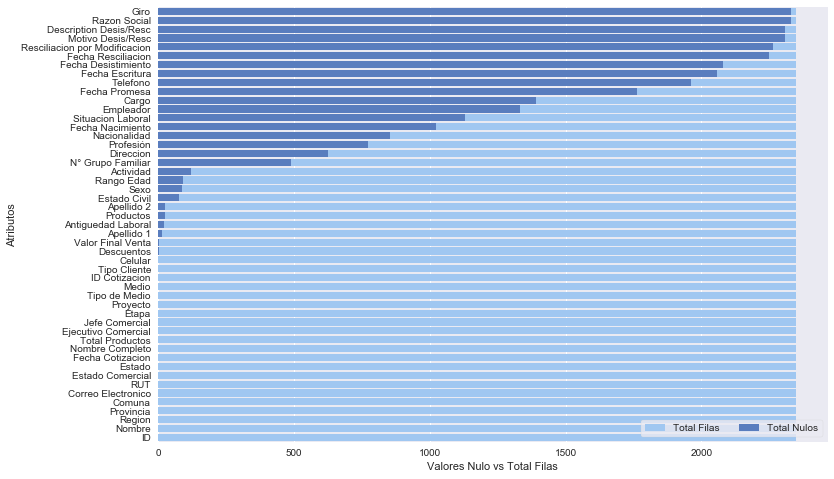

In [22]:
df = neg_all
#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

nulos = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=nulos.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
f.savefig("..\\img\\neg_all_attributes.png")